In [1]:
from lets_plot import *


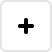
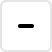
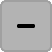
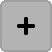
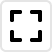
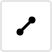
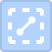
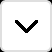
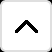
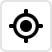
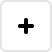
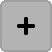
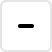
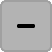
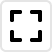
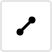
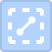
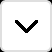
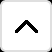
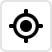

In [2]:
LetsPlot.setup_html()

In [3]:
def coord_map_plot(geom, with_map, *, min_aes='xmin', max_aes='xmax', middle_aes=None):
    min_value, middle_value, max_value = 19, 20, 21
    aes_constants = {min_aes: min_value, max_aes: max_value}
    if middle_aes is not None:
        aes_constants[middle_aes] = middle_value
    p = ggplot() + \
        geom(stat='identity', y=-15, **aes_constants) + \
        geom_point(x=min_value, y=-15, size=10, color='red') + \
        geom_point(x=max_value, y=-15, size=10, color='red') + \
        ggtitle("{0}(){1}\nEXPECTED: correct plot".format(
            geom.__name__,
            "\nwith coord_map()" if with_map else ""
        ))
    if with_map:
        p += coord_map()
    return p

gggrid([
    coord_map_plot(geom_crossbar, True), coord_map_plot(geom_crossbar, False),
    coord_map_plot(geom_errorbar, True), coord_map_plot(geom_errorbar, False),
    coord_map_plot(geom_linerange, True), coord_map_plot(geom_linerange, False),
    coord_map_plot(geom_pointrange, True, middle_aes='x'), coord_map_plot(geom_pointrange, False, middle_aes='x'),
    coord_map_plot(geom_boxplot, True, min_aes='xlower', max_aes='xupper'),
    coord_map_plot(geom_boxplot, False, min_aes='xlower', max_aes='xupper'),
], ncol=2)

In [4]:
def y_name_plot(geom, data, *, min_aes=None, max_aes=None, middle_aes=None):
    mappings = {'x': 'cat', 'y': 'val'}
    if min_aes is not None:
        mappings[min_aes] = '..ymin..'
    if max_aes is not None:
        mappings[max_aes] = '..ymax..'
    if middle_aes is not None:
        mappings[middle_aes] = '..y..'
    return ggplot(data) + \
        geom(aes(**mappings), stat='summary') + \
        ggtitle("{0}\nEXPECTED: 'val' as name for y-axis".format(geom.__name__))

data = {
    'cat': ['a', 'a', 'a', 'b', 'b', 'b'],
    'val': [100, 101, 102, 99, 101, 103],
}

gggrid([
    y_name_plot(geom_crossbar, data),
    y_name_plot(geom_errorbar, data),
    y_name_plot(geom_linerange, data),
    y_name_plot(geom_pointrange, data),
    y_name_plot(geom_boxplot, data, min_aes='lower', max_aes='upper', middle_aes='middle')
], ncol=2)